In [1]:
from spaces import *

In [2]:
import numpy as np

In [3]:
space1 = Space(name = "integer cartesian coordinates")

In [4]:
space1.append_dimension("x", int)
space1.append_dimension("y", int)

In [5]:
space2 = Space(name = "floating point polar coordinates")

In [6]:
space2.append_dimension("r", float)
space2.append_dimension("theta", float)

In [7]:
def to_polar(point):
    x = point.x
    y = point.y

    r = np.sqrt(x**2+y**2)
    if x==0:
        theta = np.sign(y)*np.pi/2
    else:
        theta = np.arctan(y/x)

    return space2.point({'r':r,'theta':theta})

def to_cart(point):
    r = point.r
    theta = point.theta

    x = int(r*np.cos(theta))
    y = int(r*np.sin(theta))

    return space1.point({'x':x,'y':y})

In [8]:
cart2polar = Block(space1,space2, to_polar)
polar2cart = Block(space2,space1, to_cart)

In [9]:
cart2polar.domain.name

'integer cartesian coordinates'

In [10]:
cart2polar.codomain.name

'floating point polar coordinates'

In [11]:
input = space1.point({'x':25,'y':33})

In [12]:
interim = cart2polar.map(input)
interim.theta, interim.r

(0.922464337707636, 41.400483088968905)

In [13]:
output = polar2cart.map(interim)
output.x, output.y

(25, 33)

In [14]:
polar2polar = cart2polar.compose(polar2cart)
cart2cart = polar2cart.compose(cart2polar)

In [15]:
cart2cart.domain.name

'integer cartesian coordinates'

In [16]:
cart2cart.codomain.name

'integer cartesian coordinates'

In [17]:
cart2cart.description

"made by composition; collapsed space is called 'floating point polar coordinates'"

In [18]:
direct = cart2cart.map(input)
direct.x, direct.y

(25, 33)

In [19]:
def random_spin(point):
    p = point.copy()
    delta = np.random.rand()*np.pi/2-np.pi/4
    p.theta +=delta
    return p

In [20]:
spin = Block(space2, space2, random_spin)

In [21]:
blocks = [cart2polar, spin, polar2cart]

In [22]:
for b in blocks:
    print(b.domain)
    print('to')
    print(b.codomain)

to
to
to


In [23]:
blocks

In [24]:
spinner = chain(blocks)

In [25]:
spinner.codomain.name

'integer cartesian coordinates'

In [26]:
spinner.domain.name

'integer cartesian coordinates'

In [27]:
spinner.description

'chain compose of [<spaces.Block object at 0x7f95e0217520>, <spaces.Block object at 0x7f9621138850>, <spaces.Block object at 0x7f95e02178b0>]'

In [28]:
xy_in = space1.point({'x':30,'y':-30})

In [29]:
xy_out = spinner.map(xy_in)

In [30]:
xy_out.x, xy_out.y

(38, -18)

Since Spinner goes from space1 to space1, it can be used as a step for a new Dynamics object

In [31]:
dyn = Dynamics(space1, step=spinner.map)

In [32]:
traj = Trajectory(xy_in)

In [33]:
traj.set_dynamics(dyn)

In [34]:
traj.apply_dynamics(100)

In [35]:
traj.points

In [36]:
t = range(traj.length)
positions = [(p.x,p.y) for p in traj.points ]

In [37]:
import matplotlib.pyplot as plt

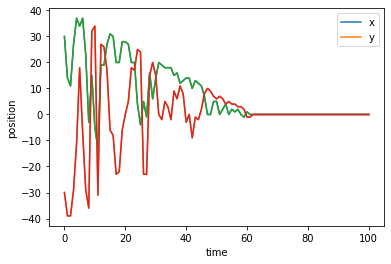

In [38]:
plt.plot(t,positions, t, positions)
plt.xlabel("time")
plt.ylabel("position")
plt.legend(["x","y"])

The choice of space1 as integer based was intentional -- the effect of this is that the system is losing magnitude as a result of rounding errors!

In [39]:
polar_coords = [cart2polar.map(p) for p in traj.points]

In [40]:
magnitudes = [p.r for p in polar_coords ]
angles = [p.theta for p in polar_coords ]

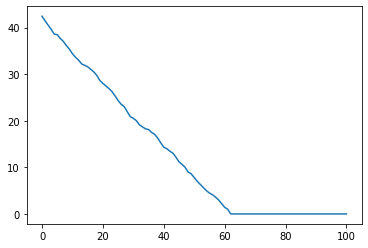

In [41]:
plt.plot(t, magnitudes)

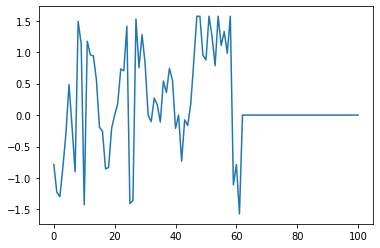

In [42]:
plt.plot(t, angles)

Text(0.5, 1.0, 'Scatter Plot')

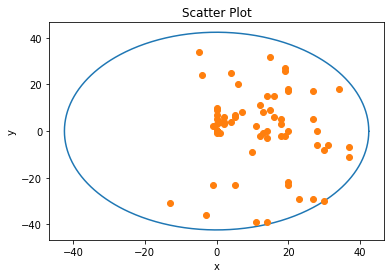

In [43]:
R = np.max(magnitudes)

xc=[]
yc=[]

for theta in np.arange(0,2*np.pi,.01):
    xc.append(R*np.cos(theta))
    yc.append(R*np.sin(theta))

pos = np.array(positions)

plt.plot(xc,yc)
plt.plot(pos.T[0], pos.T[1], 'o')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot")